# World Wide Products Inc.
Using forecasting models to determine the demand of a particular product based on other features
***

## 0. Read In Dataset
- Using dates as index for time series analysis

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('../data/Historical Product Demand.csv', index_col='Date', parse_dates = ['Date'])

data = data.fillna(method='ffill')

data['Order_Demand'].replace('[(]', '-', inplace=True, regex=True)
data['Order_Demand'].replace('[)]', '', inplace=True, regex=True)
data['Order_Demand'] = data['Order_Demand'].astype(int)

data.head()

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2012-07-27,Product_0993,Whse_J,Category_028,100
2012-01-19,Product_0979,Whse_J,Category_028,500
2012-02-03,Product_0979,Whse_J,Category_028,500
2012-02-09,Product_0979,Whse_J,Category_028,500
2012-03-02,Product_0979,Whse_J,Category_028,500


## 1. Data Exploration

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

### 1.1 Plot the Average of Order Demand vs. Year
- Using the average of order_demand to avoid ploting every data element

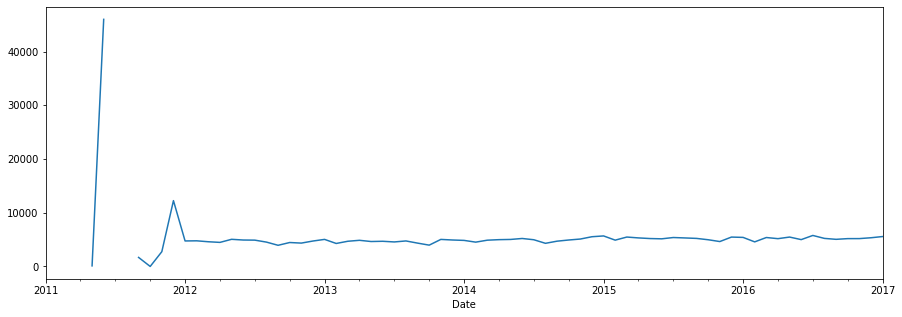

In [3]:
data_wh = data['Order_Demand'].resample('MS').mean()
data_wh.dropna()

data_wh.plot(figsize = (15,5))
plt.show()

#### Conclusion
- There is a jump between Jan, 2011 and May, 2011 due to the loss of data
- Graph shows the average of order demand had a peak around Nov, 2011
- The average of OD. from 2012 to 2017 remains at 5k. 

### 1.2 Plot the Average of Order Demand vs. Warehouse
- To look into the realtionship between order demand and other sepcific feature, we plot the graph of ave_OD vs. feature
- First feature to be plotted is warehouse

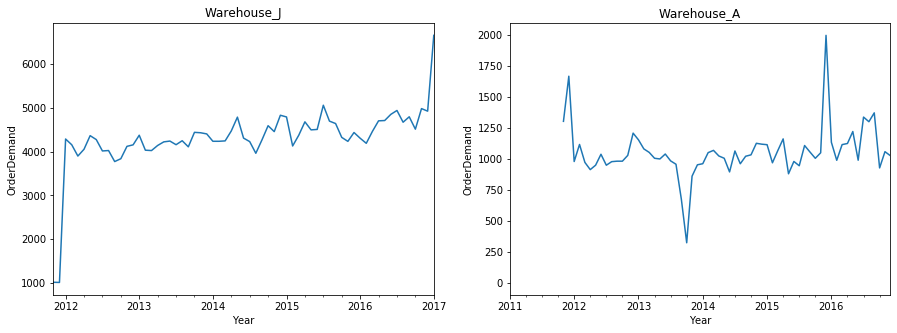

In [4]:
data_whj = data.loc[data["Warehouse"] == "Whse_J"]
data_wha = data.loc[data["Warehouse"] == "Whse_A"]

data_whj = data_whj['Order_Demand'].resample('MS').mean()
data_wha = data_wha['Order_Demand'].resample('MS').mean()

data_whj.dropna()
data_wha.dropna()

fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2 ,1)
data_whj.plot(ax = ax1)
plt.title("Warehouse_J")
plt.xlabel("Year")
plt.ylabel("OrderDemand")
ax2 = fig.add_subplot(1, 2, 2)
data_wha.plot(ax = ax2)
plt.title("Warehouse_A")
plt.xlabel("Year")
plt.ylabel("OrderDemand")

plt.show()

#### Conclusion
- There are two major increments at Warehouse J - at the end of 2011 and the end of 2016
- The trend of ave_OD is increasing overall at Warehouse J
- The ave_OD was very low at aroud Oct,2014 at Warehouse A and increased significantly at the end of 2015

### 1.3 Plot the Average of Order Demand vs. Category
- To look into the realtionship between order demand and other sepcific feature, we plot the graph of ave_od vs. Category

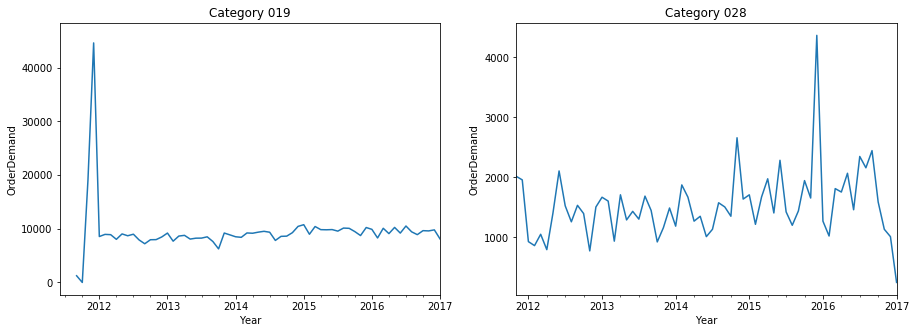

In [5]:
data_cg19 = data.loc[data["Product_Category"] == "Category_019"]
data_cg28 = data.loc[data["Product_Category"] == "Category_028"]

data_cg19 = data_cg19['Order_Demand'].resample('MS').mean()
data_cg28 = data_cg28['Order_Demand'].resample('MS').mean()

data_cg19.dropna()
data_cg28.dropna()

fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2 ,1)
data_cg19.plot(ax = ax1)
plt.title("Category 019")
plt.xlabel("Year")
plt.ylabel("OrderDemand")
ax2 = fig.add_subplot(1, 2, 2)
data_cg28.plot(ax = ax2)
plt.title("Category 028")
plt.xlabel("Year")
plt.ylabel("OrderDemand")

plt.show()

#### Conclusion
- The overall demand from category 019 is pretty similar, except for an outlier at the end of 2012. This is probably due to the loss of data, which also appeared in the graph of 1.1
- The demand from category 028 varies months to months. 
- The demand from catefory 028 has a peak at the end of 2015 and decreased dramatically at the end of 2017

### 1.4 Plot the Average of Order Demand vs. Product
- To look into the realtionship between order demand and other sepcific feature, we plot the graph of ave_od vs. Product_Code

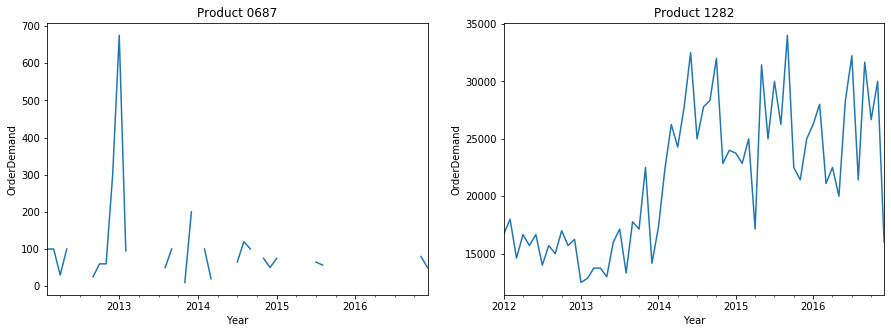

In [6]:
data_pc0687 = data.loc[data["Product_Code"] == "Product_0687"]
data_pc1282 = data.loc[data["Product_Code"] == "Product_1282"]

data_pc0687 = data_pc0687['Order_Demand'].resample('MS').mean()
data_pc1282 = data_pc1282['Order_Demand'].resample('MS').mean()

data_pc0687.dropna()
data_pc1282.dropna()

fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2 ,1)
data_pc0687.plot(ax = ax1)
plt.title("Product 0687")
plt.xlabel("Year")
plt.ylabel("OrderDemand")
ax2 = fig.add_subplot(1, 2, 2)
data_pc1282.plot(ax = ax2)
plt.title("Product 1282")
plt.xlabel("Year")
plt.ylabel("OrderDemand")

plt.show()

#### Conclusion
- The data for product 0687 suffered from a huge loss.
- The existing data for product 0687 shows it is largely required at the end of 2012.
- The demand for product 1282 is overall increasing, except for the begining of 2015. and the end of 2016.

## 2. Time Series Analysis

### 2.1 Feature Engineering
- One-Hot encode the warehouse and convert the Product_Code and Product_Category into ints

In [7]:
data = pd.get_dummies(data, columns=["Warehouse"], sparse=True)
data["Product_Code"] = data["Product_Code"].str[8:].astype(int)
data["Product_Category"] = data["Product_Category"].str[9:].astype(int)
data.head()

,Product_Code,Product_Category,Order_Demand,Warehouse_Whse_A,Warehouse_Whse_C,Warehouse_Whse_J,Warehouse_Whse_S
Date,,,,,,,
2012-07-27,993,28,100,0,0,1,0
2012-01-19,979,28,500,0,0,1,0
2012-02-03,979,28,500,0,0,1,0
2012-02-09,979,28,500,0,0,1,0
2012-03-02,979,28,500,0,0,1,0


### 2.21 Data Training
- Training : Testing = 7: 3

In [12]:
data.sort_index(inplace=True)

features = [i for i in data.columns.tolist() if (i != "Order_Demand")]
target = ["Order_Demand"]
x = data[features]
y = data[target]

train_size = int(len(x) * 0.70)

x_train, x_test = x[0:train_size], x[train_size:len(x)]
y_train, y_test = y[0:train_size], y[train_size:len(x)]

### 2.22 Gradient Boosting

In [14]:
import warnings
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    print("Gradient Boosting Regressor")
    gb = GradientBoostingRegressor()
    gb = gb.fit(x_train, y_train)
    print("Training R^2: %4.4f" %
          r2_score( y_train, gb.predict(x_train), multioutput='variance_weighted'))
    print("Testing R^2: %4.4f" %
          r2_score(y_test, gb.predict(x_test), multioutput='variance_weighted'))

Gradient Boosting Regressor
Training R^2: 0.1758
Testing R^2: 0.2001


### 2.23 Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
print("Linear Regressor")
lr = lr.fit(x_train, y_train)
print("Training R^2: %4.4f" %
          r2_score( y_train, lr.predict(x_train), multioutput='variance_weighted'))
print("Testing R^2: %4.4f" %
          r2_score(y_test, lr.predict(x_test), multioutput='variance_weighted'))

Linear Regressor
Training R^2: 0.0145
Testing R^2: 0.0158


#### Conclusion
- For this data set, I chose 30% of the data to be the training data.
- Since We want to make a desicsion 
- Gradient Boosting gives a R^2 of 0.1758 on the training set and 0.2001 on the testing data
- Linear Regression gives a R^2 of 0.0145 on the training set and 0.0158 on the testing data.
- Considering the R^2, Gradient boosting performs better on determing the demand 